<a href="https://colab.research.google.com/github/anil-mannem/INFO-5731-Spring-2024/blob/main/Mannem_Anil_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here
# Write your code here
import requests  # for making HTTP requests
import csv  # for working with CSV files
from bs4 import BeautifulSoup  # for web scraping
import pandas as pd  # for data manipulation
from pprint import pprint  # for pretty printing data

# Define the URL to scrape IMDb reviews for a specific movie
url = "https://www.imdb.com/title/tt10579952/reviews/?ref_=tt_ql_2"

# Send an HTTP GET request to the specified URL to fetch the webpage content
data = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(data.content, 'html.parser')

# Create an empty list to store IMDb user reviews
imdb_reviews = []

# Find the section of the webpage that contains user reviews
right_table = soup.find('div', {'class': "lister"})

# Loop through each review item on the webpage
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
    # Extract and append the text of each user review to the list
    imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())

# Print the IMDb user reviews to the console
pprint(imdb_reviews)

["Master's biggest plus point is vijay sethupathi. If bhavani's character was "
 'played by a normal actor, he would have been clearly overshadowed by '
 'thalapathy vijay. But since its vjs, the character is well written and is '
 "shown equally powerful than hero. We can't call him villain instead an "
 'antihero.\n'
 "Another plus point is anirudh's music and bgm which stood as the backbone of "
 'the film. Thalapathy vijay performed as usual for his fans.\n'
 'Color tone was perfect.\n'
 'But the film is very predictable and lacks logic for example an alcoholic '
 'person quits drinking without any proper treatment.\n'
 'On the whole, master is a blasting entertainer mainly due to vjs act as the '
 'ruthless gangster which makes it for me a better vijay film after a long '
 'time. First half is mainly dominated by vjs but second half is thalapathy '
 'show all the way. Those who expected to watch it for director will be '
 'disappointed but i kept those expectations away and enjoye

In [3]:
df = pd.DataFrame({'reviews': imdb_reviews})

df.to_csv('reviews.csv')
df.head()

,reviews
0,Master's biggest plus point is vijay sethupath...
1,Perfect characteristation for both VIJAY & VJS...
2,Vijay & VJS is Only Lifting The Whole Movie. A...
3,Great thing is about the movie is VIJAY vs VIJ...
4,First of all a big appreciation goes for Vijay...


In [4]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Import the nltk library for natural language processing and text analysis
import nltk

# Download the 'stopwords' dataset from NLTK, which contains common stop words
nltk.download('stopwords')

# Import the 'os' module for interacting with the operating system
import os

# Define a function to install Java, which is required for certain libraries
def install_java():
    # Install OpenJDK 8 using apt-get without displaying output
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

    # Set the JAVA_HOME environment variable to the installed Java path
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

    # Verify the Java version
    !java -version

# Call the install_java function to install Java
install_java()

# Install the 'pyLDAvis' library, which is used for visualizing LDA (Latent Dirichlet Allocation) models
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [6]:
!pip install --upgrade gensim

# Import the necessary libraries for web scraping, data manipulation, and natural language processing.
import requests  # for making HTTP requests
from bs4 import BeautifulSoup  # for parsing HTML content
import re  # for regular expressions
import pandas as pd  # for data handling and analysis
import numpy as np  # for numerical operations
import itertools  # for working with iterators
import lxml.html as LH  # for parsing HTML with lxml
import urllib.request as urllib2  # for handling URL requests


In [7]:
# Import the 're' module for working with regular expressions.
import re

# Import the 'numpy' library for numerical operations and array handling.
import numpy as np

# Import the 'pandas' library for data manipulation and analysis.
import pandas as pd

# Import the 'pprint' function for pretty-printing data, making it more readable.
from pprint import pprint

# Import Gensim libraries for topic modeling.
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Import 'spacy' for lemmatization, a technique to reduce words to their base or root form.
import spacy

# Import plotting tools for visualizing topic models.
import pyLDAvis
import pyLDAvis.gensim  # Import pyLDAvis with Gensim support.
import matplotlib.pyplot as plt  # Matplotlib for plotting.

# Enable logging for Gensim (optional). It sets the logging level to ERROR.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Suppress deprecation warnings to prevent them from cluttering the output.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
# Import the 'nltk' library, which is used for natural language processing tasks.
import nltk

# Download the 'stopwords' dataset from NLTK, which contains common stop words in English.
nltk.download('stopwords')

# Import the 'stopwords' corpus from NLTK, which includes a list of common stop words.
from nltk.corpus import stopwords

# Create a custom list of stop words by extending the NLTK stop words list with additional words.
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define a function 'sent_to_words' that tokenizes sentences into words using Gensim's 'simple_preprocess'.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Define a function 'remove_stopwords' that removes stop words from a list of tokenized texts.
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Access the 'reviews' column from a DataFrame 'df' and convert it to a list of values.
rev_data = df['reviews'].values.tolist()

# Tokenize the reviews using the 'sent_to_words' function.
rev_data_words = list(sent_to_words(rev_data))

# Remove stop words from the tokenized reviews using the 'remove_stopwords' function.
rev_data_words = remove_stopwords(rev_data_words)

# Print the tokenized and stop-word-removed words from the first review.
print(rev_data_words[:1])

[['master', 'biggest', 'plus', 'point', 'vijay', 'sethupathi', 'bhavani', 'character', 'played', 'normal', 'actor', 'would', 'clearly', 'overshadowed', 'thalapathy', 'vijay', 'since', 'vjs', 'character', 'well', 'written', 'shown', 'equally', 'powerful', 'hero', 'call', 'villain', 'instead', 'antihero', 'another', 'plus', 'point', 'anirudh', 'music', 'bgm', 'stood', 'backbone', 'film', 'thalapathy', 'vijay', 'performed', 'usual', 'fans', 'color', 'tone', 'perfect', 'film', 'predictable', 'lacks', 'logic', 'example', 'alcoholic', 'person', 'quits', 'drinking', 'without', 'proper', 'treatment', 'whole', 'master', 'blasting', 'entertainer', 'mainly', 'due', 'vjs', 'act', 'ruthless', 'gangster', 'makes', 'better', 'vijay', 'film', 'long', 'time', 'first', 'half', 'mainly', 'dominated', 'vjs', 'second', 'half', 'thalapathy', 'show', 'way', 'expected', 'watch', 'director', 'disappointed', 'kept', 'expectations', 'away', 'enjoyed', 'film', 'throughout']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Create bigram and trigram models using Gensim's Phrases to find common phrases in the text data.
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100)  # higher threshold results in fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)

# Create Phraser objects to efficiently apply the bigram and trigram models.
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define a function 'remove_stopwords' to remove stop words from a list of tokenized texts.
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Define a function 'make_bigrams' to apply the bigram model to a list of texts.
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Define a function 'make_trigrams' to apply the trigram model to a list of texts.
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Define a function 'lemmatization' to perform lemmatization on a list of texts, considering specified part-of-speech tags.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stop words from the tokenized reviews.
data_words_nostops = remove_stopwords(rev_data_words)

# Apply the bigram model to the tokenized reviews.
data_words_bigrams = make_bigrams(data_words_nostops)

# Load the spaCy language model 'en_core_web_sm' and disable parser and named entity recognition (NER) components.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Perform lemmatization on the text data, considering specified part-of-speech tags.
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data from the first review.
print(data_lemmatized[:1])

[['master', 'big', 'point', 'character', 'play', 'normal', 'actor', 'clearly', 'overshadow', 'thalapathy', 'vijay', 'character', 'well', 'write', 'show', 'equally', 'powerful', 'hero', 'call', 'villain', 'instead', 'antihero', 'point', 'anirudh', 'music', 'bgm', 'stand', 'backbone', 'film', 'perform', 'usual', 'fan', 'color', 'tone', 'perfect', 'film', 'predictable', 'lack', 'logic', 'example', 'alcoholic', 'person', 'quit', 'drink', 'proper', 'treatment', 'whole', 'master', 'blasting', 'entertainer', 'mainly', 'due', 'ruthless', 'gangster', 'make', 'well', 'vijay', 'film', 'long', 'time', 'first', 'half', 'mainly', 'dominate', 'second', 'half', 'thalapathy', 'show', 'way', 'expect', 'watch', 'director', 'disappoint', 'keep', 'expectation', 'away', 'enjoy', 'film']]


In [10]:
review_id2word = corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 4), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1)]]


[[('actor', 1),
  ('alcoholic', 1),
  ('anirudh', 1),
  ('antihero', 1),
  ('away', 1),
  ('backbone', 1),
  ('bgm', 1),
  ('big', 1),
  ('blasting', 1),
  ('call', 1),
  ('character', 2),
  ('clearly', 1),
  ('color', 1),
  ('director', 1),
  ('disappoint', 1),
  ('dominate', 1),
  ('drink', 1),
  ('due', 1),
  ('enjoy', 1),
  ('entertainer', 1),
  ('equally', 1),
  ('example', 1),
  ('expect', 1),
  ('expectation', 1),
  ('fan', 1),
  ('film', 4),
  ('first', 1),
  ('gangster', 1),
  ('half', 2),
  ('hero', 1),
  ('instead', 1),
  ('keep', 1),
  ('lack', 1),
  ('logic', 1),
  ('long', 1),
  ('mainly', 2),
  ('make', 1),
  ('master', 2),
  ('music', 1),
  ('normal', 1),
  ('overshadow', 1),
  ('perfect', 1),
  ('perform', 1),
  ('person', 1),
  ('play', 1),
  ('point', 2),
  ('powerful', 1),
  ('predictable', 1),
  ('proper', 1),
  ('quit', 1),
  ('ruthless', 1),
  ('second', 1),
  ('show', 2),
  ('stand', 1),
  ('thalapathy', 2),
  ('time', 1),
  ('tone', 1),
  ('treatment', 1),
  ('

In [11]:
review_id2word[1]

'alcoholic'

In [12]:
# Import the 'pprint' function for pretty-printing output.
from pprint import pprint

# Create an LDA (Latent Dirichlet Allocation) model using Gensim's 'ldamodel.LdaModel'.
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    id2word=review_id2word,  # The dictionary mapping word IDs to words.
    num_topics=20,  # The number of topics to identify.
    random_state=100,  # Set a random state for reproducibility.
    update_every=1,  # How often to update the model.
    chunksize=100,  # The number of documents to use in each training chunk.
    passes=10,  # The number of times the entire corpus should be iterated.
    alpha='auto',  # Automatic setting for the alpha hyperparameter.
    per_word_topics=True  # Return per-word topic probabilities.
)

# Print the topics discovered by the LDA model.
pprint(lda_model.print_topics())

# Apply the LDA model to the document corpus to obtain topic distributions.
doc_lda = lda_model[review_corpus]

[(0,
  '0.057*"movie" + 0.046*"make" + 0.038*"story" + 0.028*"vijay" + 0.019*"well" '
  '+ 0.019*"good" + 0.019*"time" + 0.019*"line" + 0.019*"want" + '
  '0.019*"theatre"'),
 (1,
  '0.094*"movie" + 0.048*"watch" + 0.032*"time" + 0.032*"get" + 0.032*"long" + '
  '0.032*"enjoy" + 0.032*"theater" + 0.016*"mass" + 0.016*"fan" + '
  '0.016*"level"'),
 (2,
  '0.041*"vijay" + 0.041*"movie" + 0.041*"fan" + 0.021*"mass" + 0.021*"play" + '
  '0.021*"music" + 0.021*"overall" + 0.021*"good" + 0.021*"lot" + '
  '0.021*"turn"'),
 (3,
  '0.034*"look" + 0.034*"certain" + 0.017*"action" + 0.017*"character" + '
  '0.017*"terrific" + 0.017*"entertainer" + 0.017*"hero" + 0.017*"part" + '
  '0.017*"fan" + 0.017*"rather"'),
 (4,
  '0.034*"mass" + 0.034*"watch" + 0.034*"entertainer" + 0.034*"masala" + '
  '0.034*"worth" + 0.034*"naild" + 0.034*"complete" + 0.034*"show" + '
  '0.002*"action" + 0.002*"vijay"'),
 (5,
  '0.039*"carrier" + 0.026*"good" + 0.014*"master" + 0.013*"film" + '
  '0.013*"movie" + 0.013

In [13]:
# Calculate the coherence score for the LDA model using the 'CoherenceModel' from Gensim.
coherence_model_lda = CoherenceModel(
    model=lda_model,  # The LDA model to evaluate.
    texts=data_lemmatized,  # The lemmatized text data.
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    coherence='c_v'  # Specify the coherence measure to use ('c_v' in this case).
)

# Obtain the coherence score.
coherence_lda = coherence_model_lda.get_coherence()

# Print the computed coherence score.
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36623074758782115


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LDA models with varying numbers of topics.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Maximum number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to LDA models with different numbers of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Create an LDA model with the specified number of topics.
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,  # The bag-of-words corpus of the text data.
            id2word=dictionary,  # The dictionary mapping word IDs to words.
            num_topics=num_topics,  # Number of topics to identify.
            random_state=100,  # Set a random state for reproducibility.
            update_every=1,  # How often to update the model.
            chunksize=100,  # The number of documents to use in each training chunk.
            passes=10,  # The number of times the entire corpus should be iterated.
            alpha='auto',  # Automatic setting for the alpha hyperparameter.
            per_word_topics=True  # Return per-word topic probabilities.
        )

        model_list.append(model)

        # Calculate the coherence score using the 'CoherenceModel' for the current model.
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')

        # Append the coherence value to the list.
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Specify parameters for the number of topics to evaluate.
start, limit, step = 2, 20, 2

# Call the 'compute_coherence_values' function to compute coherence values for various LDA models.
model_list, coherence_values = compute_coherence_values(
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    texts=data_lemmatized,  # The lemmatized text data.
    start=start, limit=limit, step=step  # Parameters for the number of topics to evaluate.
)

# Store and print the computed coherence values for each number of topics.
cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv, 4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1701
Num Topics = 4  has Coherence Value of 0.2291
Num Topics = 6  has Coherence Value of 0.2631
Num Topics = 8  has Coherence Value of 0.312
Num Topics = 10  has Coherence Value of 0.3039
Num Topics = 12  has Coherence Value of 0.3413
Num Topics = 14  has Coherence Value of 0.4169
Num Topics = 16  has Coherence Value of 0.3743
Num Topics = 18  has Coherence Value of 0.3657


In [15]:
sum(cohe_val)/len(cohe_val)

0.30848888888888887

In [16]:
# Choose the optimal LDA model from the list of models (index 3 in this case, corresponding to 8 topics).
optimal_model = model_list[3]

# Get the topics of the chosen LDA model.
model_topics = optimal_model.show_topics(formatted=False)

# Pretty-print the top 10 words for each topic in the LDA model.
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.057*"movie" + 0.028*"story" + 0.024*"make" + 0.022*"watch" + '
  '0.015*"theater" + 0.015*"direction" + 0.015*"find" + 0.015*"well" + '
  '0.014*"line" + 0.014*"want"'),
 (1,
  '0.051*"movie" + 0.031*"enjoy" + 0.021*"thalapathy" + 0.021*"fan" + '
  '0.021*"lead" + 0.021*"level" + 0.011*"time" + 0.011*"screenplay" + '
  '0.011*"long" + 0.011*"big"'),
 (2,
  '0.033*"vijay" + 0.025*"movie" + 0.025*"act" + 0.017*"go" + 0.017*"see" + '
  '0.017*"thalapathy" + 0.017*"mannerism" + 0.017*"watch" + 0.017*"big" + '
  '0.017*"anirudh"'),
 (3,
  '0.022*"show" + 0.022*"entertainer" + 0.022*"film" + 0.017*"character" + '
  '0.016*"watch" + 0.012*"look" + 0.012*"certain" + 0.012*"hero" + '
  '0.012*"alcoholic" + 0.012*"long"'),
 (4,
  '0.019*"hour" + 0.016*"master" + 0.016*"really" + 0.016*"half" + 0.016*"way" '
  '+ 0.014*"story" + 0.011*"vera" + 0.011*"watch" + 0.011*"move" + '
  '0.011*"screen"'),
 (5,
  '0.035*"vijay" + 0.032*"movie" + 0.020*"good" + 0.020*"thing" + 0.018*"time" '
  '+ 

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [17]:
# Write your code here
# Import the LsiModel class from Gensim.
from gensim.models import LsiModel

# Create an LSI (Latent Semantic Indexing) model using Gensim's 'LsiModel'.
lsamodel = LsiModel(
    review_corpus,  # The bag-of-words corpus of the text data.
    num_topics=10,  # The number of topics to identify.
    id2word=review_id2word  # The dictionary mapping word IDs to words.
)

# Print the top 10 words for each of the 10 topics in the LSI model.
print(lsamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.357*"action" + 0.287*"vijay" + 0.264*"film" + 0.263*"master" + 0.225*"movie" + 0.168*"time" + 0.135*"character" + 0.134*"story" + 0.134*"hour" + 0.126*"mass"'), (1, '0.386*"movie" + 0.307*"master" + 0.206*"thalapathy" + 0.188*"lokesh" + 0.174*"protagonist" + 0.140*"antagonist" + -0.135*"hour" + 0.128*"character" + 0.124*"unique" + 0.116*"clash"'), (2, '0.412*"movie" + 0.304*"vijay" + -0.234*"master" + -0.182*"action" + 0.167*"make" + 0.160*"watch" + 0.157*"time" + 0.156*"thing" + -0.122*"antagonist" + 0.122*"act"'), (3, '0.321*"film" + -0.248*"movie" + 0.204*"show" + 0.202*"half" + 0.197*"mainly" + 0.197*"point" + 0.167*"well" + 0.162*"thalapathy" + -0.150*"action" + 0.121*"character"'), (4, '0.242*"thing" + 0.224*"people" + 0.186*"different" + -0.179*"make" + -0.178*"story" + 0.177*"life" + -0.161*"good" + -0.152*"movie" + 0.148*"look" + 0.143*"character"'), (5, '-0.270*"make" + 0.234*"watch" + -0.189*"time" + 0.187*"big" + -0.187*"story" + 0.185*"anirudh" + -0.181*"line" + -0

In [18]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LSA models with varying numbers of topics.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Maximum number of topics

    Returns:
    -------
    model_list : List of LSA models
    coherence_values : Coherence values corresponding to LSA models with different numbers of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Create an LSA model with the specified number of topics.
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(lsamodel)

        # Calculate the coherence score using the 'CoherenceModel' for the current LSA model.
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')

        # Append the coherence value to the list.
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Specify parameters for the number of topics to evaluate.
start, limit, step = 2, 20, 2

# Call the 'compute_lsa_coherence_values' function to compute coherence values for various LSA models.
model_lsa, coherence_values = compute_lsa_coherence_values(
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    corpus=review_corpus,  # The bag-of-words corpus of the text data.
    texts=data_lemmatized,  # The lemmatized text data.
    start=start, limit=limit, step=step  # Parameters for the number of topics to evaluate.
)

# Store and print the computed coherence values for each number of topics.
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv, 4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.3967
Topic no = 4  it's Coherence Value is 0.5955
Topic no = 6  it's Coherence Value is 0.5521
Topic no = 8  it's Coherence Value is 0.6381
Topic no = 10  it's Coherence Value is 0.6093
Topic no = 12  it's Coherence Value is 0.4991
Topic no = 14  it's Coherence Value is 0.4969
Topic no = 16  it's Coherence Value is 0.4046
Topic no = 18  it's Coherence Value is 0.4615


In [19]:
# Calculate the coherence score for the LSA model using the 'CoherenceModel' from Gensim.
coherencemodel = CoherenceModel(
    model=lsamodel,  # The LSA model to evaluate.
    texts=data_lemmatized,  # The lemmatized text data.
    dictionary=review_id2word,  # The dictionary mapping word IDs to words.
    coherence='c_v'  # Specify the coherence measure to use ('c_v' in this case).
)

# Print the computed coherence score.
print(coherencemodel.get_coherence())

0.4787782125798655


In [20]:
coherence_values_all

[0.3967, 0.5955, 0.5521, 0.6381, 0.6093, 0.4991, 0.4969, 0.4046, 0.4615]

In [21]:
# Calculate the average coherence value by summing all the coherence values and dividing by the total number of values.
average_coherence = sum(coherence_values_all) / len(coherence_values_all)

# Print the computed average coherence value.
print("Average Coherence Value:", average_coherence)

Average Coherence Value: 0.5170888888888888


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [22]:
# Write your code here
# Download all NLTK data packages.
nltk.download('all')

# Install the 'preprocess' package using pip.
!pip install preprocess

# Import necessary libraries for visualization and data analysis.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Enable and initialize the pyLDAvis library for interactive visualization.
import pyLDAvis
pyLDAvis.enable_notebook()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [23]:
# Initialize the number of top words to extract per topic.
top_value = 10

# Create a dictionary to store the top words for each topic.
top_topic_words = {}

# Loop through the topics and their associated words.
for j, topic_to_word in enumerate(df.reviews.tolist()):
    # Sort the words in descending order based on their importance in the topic.
    top_words = np.argsort(topic_to_word)[::-1][:top_value]

    # Prepare a message to display the topic and its top words.
    msg = 'Topic %i ' % j
    top_words_list = [df.reviews.tolist()[i].strip()[:35] for i in top_words]
    msg += 'has stop words '.join(top_words_list)

    # Print the message.
    print(msg)

    # Store the top words for the current topic in the dictionary.
    top_topic_words[j] = top_words_list

Topic 0 Master's biggest plus point is vija
Topic 1 Master's biggest plus point is vija
Topic 2 Master's biggest plus point is vija
Topic 3 Master's biggest plus point is vija
Topic 4 Master's biggest plus point is vija
Topic 5 Master's biggest plus point is vija
Topic 6 Master's biggest plus point is vija
Topic 7 Master's biggest plus point is vija
Topic 8 Master's biggest plus point is vija
Topic 9 Master's biggest plus point is vija
Topic 10 Master's biggest plus point is vija
Topic 11 Master's biggest plus point is vija
Topic 12 Master's biggest plus point is vija
Topic 13 Master's biggest plus point is vija
Topic 14 Master's biggest plus point is vija
Topic 15 Master's biggest plus point is vija
Topic 16 Master's biggest plus point is vija
Topic 17 Master's biggest plus point is vija
Topic 18 Master's biggest plus point is vija
Topic 19 Master's biggest plus point is vija
Topic 20 Master's biggest plus point is vija
Topic 21 Master's biggest plus point is vija
Topic 22 Master's bi

<BarContainer object of 20 artists>

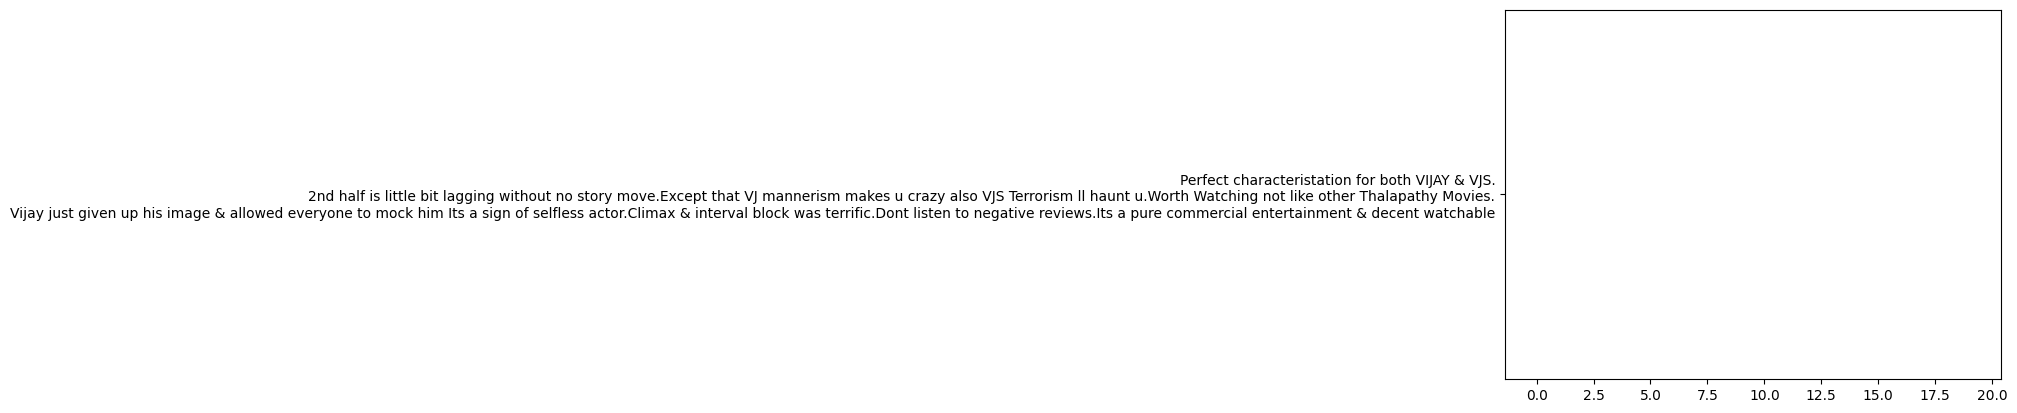

In [24]:
plt.bar(np.arange(20), df.reviews.tolist()[1])

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [25]:
# Write your code here
!pip install bertopic

In [26]:
# Import the BERTopic library.
from bertopic import BERTopic

# Create a BERTopic model with specific configuration settings.
topic_model = BERTopic(
    language="english",  # Specify the language for text processing (English in this case).
    calculate_probabilities=True,  # Calculate topic probabilities for each document.
    verbose=True  # Enable verbose mode for more detailed output.
)

# Fit the BERTopic model to the list of text reviews from 'df.reviews.tolist()'.
topics, probs = topic_model.fit_transform(df.reviews.tolist())

# Get the topic information and store it in the 'freq' DataFrame.
freq = topic_model.get_topic_info()

# Display the top 5 rows of the 'freq' DataFrame to inspect the topic information.
freq.head(5)

2024-03-29 23:20:36,435 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-29 23:20:51,636 - BERTopic - Embedding - Completed ✓
2024-03-29 23:20:51,643 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 23:21:02,771 - BERTopic - Dimensionality - Completed ✓
2024-03-29 23:21:02,773 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 23:21:02,784 - BERTopic - Cluster - Completed ✓
2024-03-29 23:21:02,791 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 23:21:02,825 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,23,-1_the_and_to_of,"[the, and, to, of, is, vijay, movie, in, for, as]",[Master's biggest plus point is vijay sethupat...


In [27]:
topic_model.get_topic(-1)

[('the', 0.14884582449819325),
 ('and', 0.08621042787009645),
 ('to', 0.08015170048983765),
 ('of', 0.08015170048983765),
 ('is', 0.07704590928608102),
 ('vijay', 0.06738665866328607),
 ('movie', 0.06404071757257299),
 ('in', 0.060624325853490986),
 ('for', 0.060624325853490986),
 ('as', 0.057132098467778406)]

In [28]:
# Visualize the term rank for topics using the topic_model.
topic_model.visualize_term_rank()

In [29]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [30]:
# Write your code here
LDA is a well-liked and comparatively simple topic modeling model.
To start, we would tokenize the text in our corpus, eliminate stopwords, and carry out any further text-cleaning operations that were required. \
Next, we would define the number of subjects we wish to identify and use the Gensim package to train an LDA model on our corpus.
After the model is trained, we can use it to look at each document's most likely subjects and infer the topic distributions for each document in the corpus.
Due to its propensity for high computing overhead, LDA may have trouble processing very big datasets.
One matrix factorization method that may be applied to topic modeling is LSA.
After preprocessing our corpus like we did for LDA, we would do singular value decomposition on the term-document matrix using the scikit-learn module.
We may cluster the texts into themes and look at the most representative terms for each subject once we have determined the underlying semantic structure of the corpus.
Word order issues and interpretability may be issues with LSA compared to other models.
A more sophisticated model called lda2vec combines the benefits of word embeddings and LDA to produce topic models that are more precise and comprehensible.
As with LDA, we would preprocess our corpus and train a neural network to learn topic and word vectors at the same time.
After the model is trained, we can use it to look at each document's most likely subjects and infer the topic distributions for each document in the corpus.
The disadvantage of lda2vec is that its implementation demands more technical knowledge and is more computationally demanding.
Based on BERT, the most advanced neural network design for natural language processing, Bertopic is a more recent model.
After preprocessing our corpus in the same way as the other models, we would cluster the texts into themes using the bertopic library.
Although Bertopic may be more accurate than other models and able to handle vast and complex information, training it may need more computing power.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

A number of fundamental ideas and methods, including tokenization, stop-word removal, lemmatization, and part-of-speech tagging, are involved in the process of extracting characteristics from text data. Understanding how these methods may be applied to preprocess and extract significant characteristics from unprocessed text input is the most advantageous part of this process. Selecting which characteristics to utilize and how to describe them in a way that makes sense for machine learning models is the difficult part.
Since it serves as the basis for several text-based tasks including sentiment analysis, document categorization, and information retrieval, this exercise is pertinent to the subject of natural language processing.



'''